**Email Spam Detection**

In [5]:
#import the libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [6]:
#load the dataset
spam1 = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [7]:
spam1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
spam1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
spam2 = spam1.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [10]:
spam2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
spam2

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
spam2.shape

(5572, 2)

In [13]:
spam2.sample(2)

,v1,v2
1593,spam,PRIVATE! Your 2003 Account Statement for shows...
5287,ham,Hey ! Don't forget ... You are MINE ... For ME...


In [14]:
spam = spam2.rename(columns={'v1':'Target', 'v2':'Email'})

In [15]:
spam.info

<bound method DataFrame.info of      Target                                              Email
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [16]:
# Encoding data
encoder = LabelEncoder()
spam['Target'] = encoder.fit_transform(spam['Target'])
spam.tail(70)

,Target,Email
5502,0,Apo all other are mokka players only
5503,0,Perhaps * is much easy give your account ident...
5504,0,Wait . I will msg after &lt;#&gt; min.
5505,0,What i told before i tell. Stupid hear after i...
5506,0,God's love has no limit. God's grace has no me...
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
spam.isna().sum()


,0
Target,0
Email,0


In [18]:
spam.duplicated().sum()

403

In [19]:
spam = spam.drop_duplicates(keep='first')

In [20]:
spam.duplicated().sum()

0

In [21]:
spam.info

<bound method DataFrame.info of       Target                                              Email
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
5567       1  This is the 2nd time we have tried 2 contact u...
5568       0              Will Ì_ b going to esplanade fr home?
5569       0  Pity, * was in mood for that. So...any other s...
5570       0  The guy did some bitching but I acted like i'd...
5571       0                         Rofl. Its true to its name

[5169 rows x 2 columns]>

In [22]:
spam['Target'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int64>

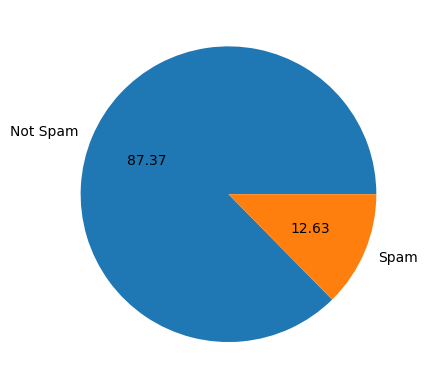

In [23]:
plt.pie(spam['Target'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.2f")
plt.show()

Our data is not balanced, we'll use RandomOverSampler to balance the dataset.

In [38]:
X = spam['Email']
y = spam['Target']

In [25]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = X.values.reshape(-1, 1)

ros = RandomOverSampler(sampling_strategy='minority')
X_res, y_res = ros.fit_resample(X, y)


In [26]:
spam = pd.DataFrame({'Email': X_res.ravel(), 'Target': y_res})

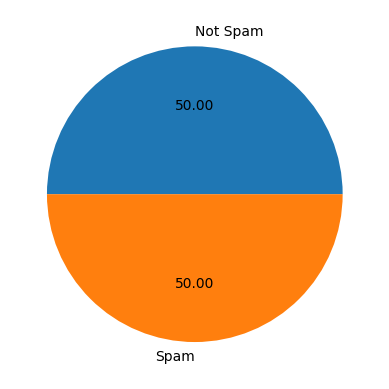

In [27]:
plt.pie(spam['Target'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.2f")
plt.show()

In [28]:
spam

,Email,Target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
9027,Cashbin.co.uk (Get lots of cash this weekend!)...,1
9028,88800 and 89034 are premium phone services cal...,1
9029,PRIVATE! Your 2003 Account Statement for 07808...,1
9030,Dear Matthew please call 09063440451 from a la...,1


**Text Processing**

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download NLTK stopwords and wordnet data if not already downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define text preprocessing function
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenizing and removing stopwords, applying lemmatization
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)


# Apply preprocessing
spam['Email'] = spam['Email'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [30]:
spam

,Email,Target
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,u dun say early hor u c already say,0
4,nah dont think go usf life around though,0
...,...,...
9027,cashbincouk get lot cash weekend wwwcashbincou...,1
9028,premium phone service call,1
9029,private account statement xxxxxx show unredeem...,1
9030,dear matthew please call landline complimentar...,1


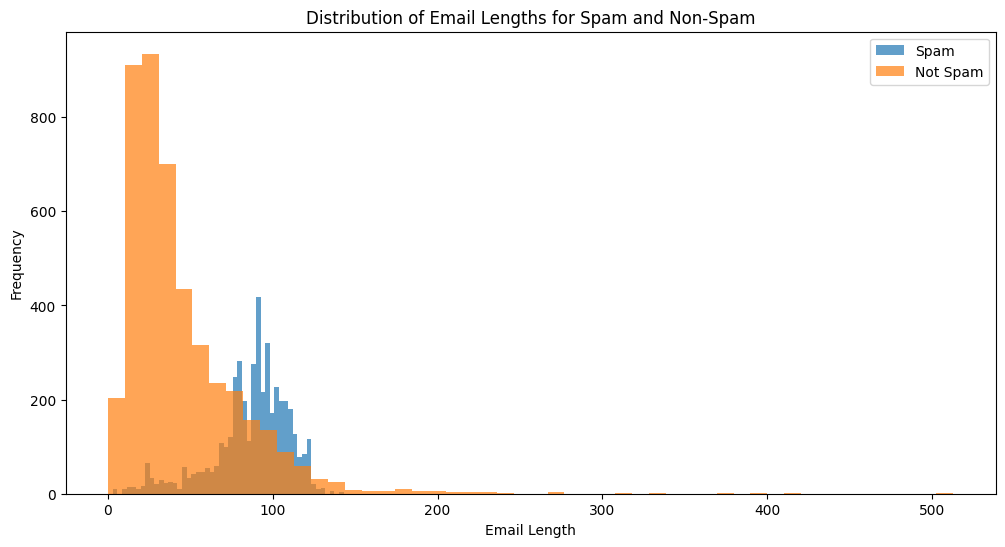

In [31]:
spam['Email_length'] = spam['Email'].apply(len)

plt.figure(figsize=(12, 6))
plt.hist(spam[spam['Target'] == 1]['Email_length'], bins=50, alpha=0.7, label='Spam')
plt.hist(spam[spam['Target'] == 0]['Email_length'], bins=50, alpha=0.7, label='Not Spam')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Email Lengths for Spam and Non-Spam')
plt.show()

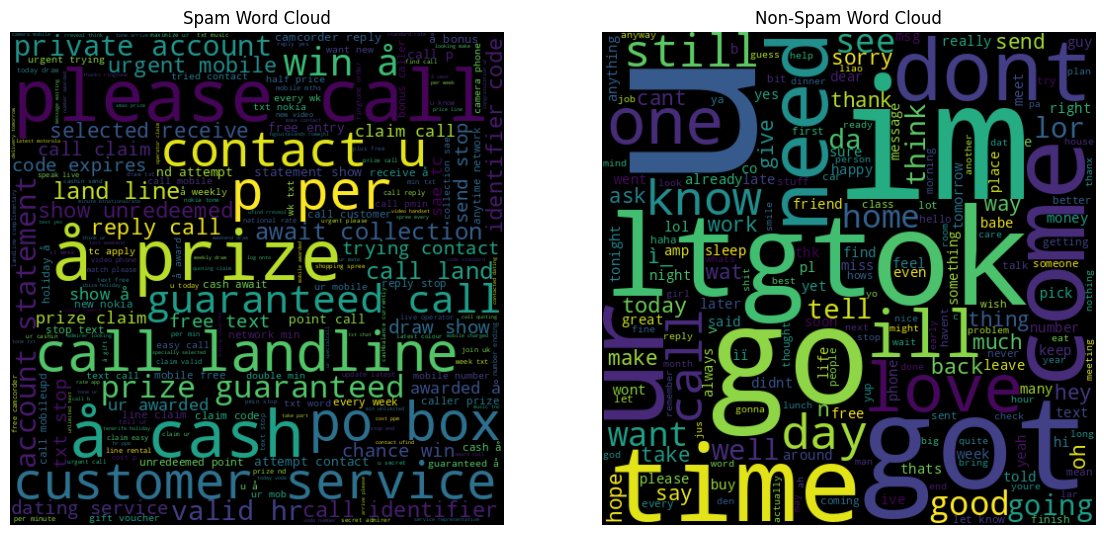

In [32]:
from wordcloud import WordCloud

# Separate spam and non-spam messages
spam_words = ' '.join(list(spam[spam['Target'] == 1]['Email']))
non_spam_words = ' '.join(list(spam[spam['Target'] == 0]['Email']))

# Generate word clouds
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
wordcloud = WordCloud(width=500, height=500, background_color='black').generate(spam_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud = WordCloud(width=500, height=500, background_color='black').generate(non_spam_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Non-Spam Word Cloud')
plt.axis('off')
plt.show()


Now we'll convert preprocessed text into numerical features

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Fit and transform the text data
X = tfidf.fit_transform(spam['Email']).toarray()

# Target variable encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(spam['Target'])

**Train test split**

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to confirm the split
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (7225, 3000)
Test data shape: (1807, 3000)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
nb_model = MultinomialNB()
svm_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100)

# Train each model
logistic_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Function to evaluate and print metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Evaluate models
print("Logistic Regression Evaluation:")
evaluate_model(logistic_model, X_test, y_test)


print("\nNaive Bayes Evaluation:")
evaluate_model(nb_model, X_test, y_test)

print("\nSupport Vector Machine Evaluation:")
evaluate_model(svm_model, X_test, y_test)

print("\nRandom Forest Evaluation:")
evaluate_model(rf_model, X_test, y_test)


Logistic Regression Evaluation:
Accuracy: 0.9905921416712784
Precision: 0.9860515021459227
Recall: 0.9956663055254604
F1 Score: 0.9908355795148248

Confusion Matrix:
 [[871  13]
 [  4 919]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       884
           1       0.99      1.00      0.99       923

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807


Naive Bayes Evaluation:
Accuracy: 0.96956281128943
Precision: 0.9717391304347827
Recall: 0.9685807150595883
F1 Score: 0.9701573521432447

Confusion Matrix:
 [[858  26]
 [ 29 894]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       884
           1       0.97      0.97      0.97       923

    accuracy                           0.97      1807
   macro avg       0.97      0.97 

based on the results above, we will choose **Random Forest model** It is highly accurate and reliable for this task, with minimal misclassification of spam and non-spam emails

In [46]:
# The final model
print("Final Model Evaluation:")
evaluate_model(rf_model, X_test, y_test)

Final Model Evaluation with Optimized Parameters:
Accuracy: 0.9988931931377975
Precision: 0.9978378378378379
Recall: 1.0
F1 Score: 0.9989177489177489

Confusion Matrix:
 [[882   2]
 [  0 923]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       884
           1       1.00      1.00      1.00       923

    accuracy                           1.00      1807
   macro avg       1.00      1.00      1.00      1807
weighted avg       1.00      1.00      1.00      1807



Now we'll save our model as a pickle file.

In [47]:
import pickle

# Save the model to a pickle file
with open('spam_detector_model.pkl', 'wb') as email_spam_detector:
    pickle.dump(rf_model, email_spam_detector)
